## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
data = pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')



In [2]:
data.shape

(30165, 2)

In [3]:
data.loc[0,'text']

"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur ste

<Axes: xlabel='count', ylabel='category'>

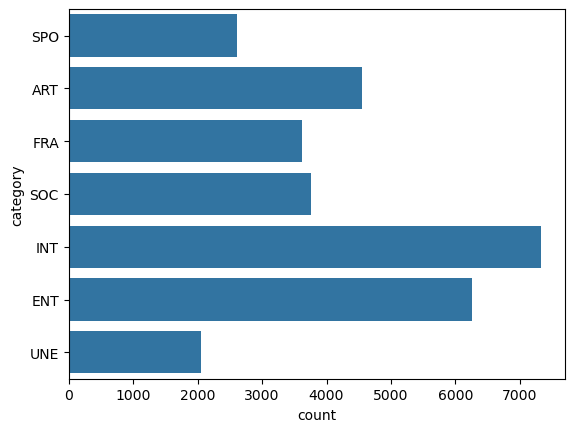

In [4]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=data,y='category')
# YOUR CODE HERE

In [5]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
data.sample(n=4)# YOUR CODE HERE


text  \
4153   le président du conseil de surveillance d'axa claude bébéar aime à le répéter beaucoup de ce que l'on dit de lui ces temps-ci est faux ou malintentionné il n'est pas assure-t-il le nouveau parrain du capitalisme tel qu'on veut le présenter intervenant un jour en coulisse pour faire chuter jean-marie messier de la présidence de vivendi universal et imposer à sa place l'un de ses proches jean-rené fourtou poussant le lendemain un autre de ses poulains thierry breton à la tête de france télécom facilitant par la suite l'arrivée de denis kessler à la tête du groupe de réassurance scor avant d'intervenir pour essayer d'écarter discrètement jean-pierre tirouflet de la direction de l'entreprise chimique rhodia m. bébéar se défend de tout cela comme d'avoir la moindre envie de tirer en coulisses les ficelles du monde parisien des affaires il ne cesse de le répéter il n'a aucune aspiration à devenir un nouvel ambroise roux qu'il a tant critiqué par le passé au nom de la transparence des marchés quand on l'interroge sur le sujet il assure maintenant qu'il a pris du champ avec axa qu'il n'a plus qu'une seule passion faire vivre le débat d'idées à travers sa fondation l'institut montaigne et son club patronal entreprises et cité cette présentation des choses cependant a de plus en plus de mal à convaincre dans le milieu des affaires qu'il le veuille ou non m. bébéar agace certes sur la place de paris nul n'ose s'exprimer publiquement sur le sujet l'homme est puissant et redouté même s'il a pris du large il a encore une influence plus que notable sur axa qui dispose d'une force de frappe de plusieurs milliards d'euros et il demeure administrateur de schneider electric et de bnp paribas mais dans le petit microcosme du capitalisme national comme sur les marchés on parle de plus en plus du cas bébéar le sujet est d'autant plus discuté que l'homme d'affaires se retrouve bon gré mal gré au centre de deux grandes affaires du moment vivendi universal et rhodia les deux groupes tiennent leur assemblée générale mardi 29 avril et une partie de leur devenir semble entre ses mains même s'il s'en défend dans un premier temps l'intervention aussi discrète qu'énergique de m. bébéar dans un dossier qui de prime abord ne le concernait pas celui de vivendi universal n'a choqué personne voici un an quand la crise du géant français de la communication s'est nouée la communauté financière française s'est prise à redouter que l'affaire ne finisse par ternir l'image de toute la place de paris les milieux bancaires comme industriels ont ressenti un lâche soulagement quand ils ont vu que l'ex-pdg d'axa brusquant l'indolence ou la passivité du conseil d'administration du groupe avait le courage ou l'audace de prendre l'affaire en main pour l'ensemble de la place et d'organiser la destitution de m. messier grâce à lui et même s'il s'est toujours gardé de s'en vanter observe l'un des grands banquiers parisiens on a pu dire que les principes du gouvernement d'entreprise ont en france bien fonctionné puisqu'il a été mis un terme à la folle aventure de m. messier il a évité tout un questionnement des investisseurs internationaux sur nos règles capitalistiques ce qui aurait été très déstabilisant pour de nombreux groupes dit un autre mais aujourd'hui la gratitude est en train de s'effacer devant l'agacement tout au long de l'automne les milieux patronaux ont commencé à s'interroger sur la montée en puissance de m. bébéar même s'il restait discret il est venu peu à peu au centre de nombreux dossiers a chaque difficulté gouvernement ou patrons n'ont pas manqué de le consulter pour avoir son avis et quand il a fallu chercher des dirigeants nouveaux ce sont d'abord les noms d'hommes proches de lui ou de son réseau qui ont émergé tant d'influence a suscité quelque jalousie chez certains patrons mais aussi pas mal d'inquiétude chez beaucoup d'autres aucun d'entre eux ne veut voir ressusciter même sous une forme modernisée un capitalisme d'influence avec ses par

In [6]:
!pip install wordcloud
from wordcloud import WordCloud

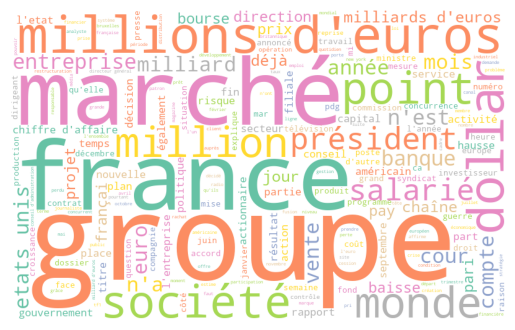

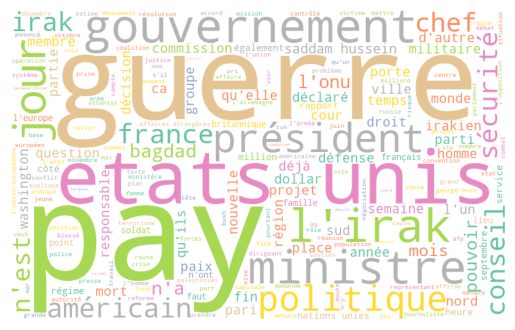

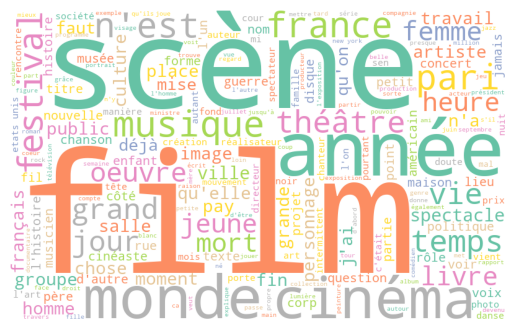

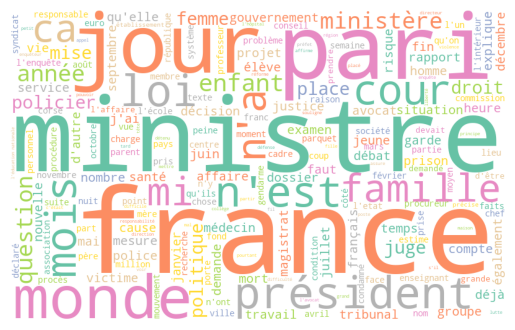

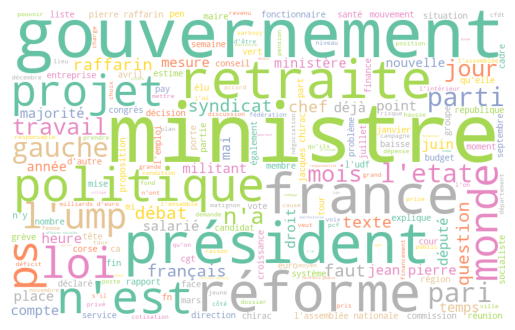

In [33]:
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    data_temp = data[data['category']==cat]
    list_ind = list(data_temp.index)
    whole_words = ''
    for i in list_ind:
        content = data_temp.loc[i,'text']
        content = str(content)
        tokens = content.split()
        whole_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800,
                          height = 500,
                          background_color ='white',
                          random_state = 21,
                          stopwords = STOPWORDS,
                          colormap='Set2').generate(whole_words)
 
# plot the WordCloud image                       
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.show()
 # YOUR CODE HERE


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE


X_train, X_test, y_train, y_test = train_test_split(data['text'],data['category'],test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test,y_test,test_size=0.5)

In [9]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(24132,)
(3017,)
(24132,)
(3017,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_dev_counts = vectorizer.transform(X_dev)
# fit on train data

# apply it on train and dev data


In [14]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts,y_train)

# Evaluate 


MultinomialNB()

In [15]:
print('for training : ',clf.score(X_train_counts,y_train),'\n',
      'for dev : ', clf.score(X_dev_counts,y_dev), '\n',
      'for test : ', clf.score(X_test_counts,y_test))

for training :  0.7306895408586109 
 for dev :  0.718501326259947 
 for test :  0.723566456745111


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

In [17]:
clf_tf = MultinomialNB()
clf_tf.fit(X_train_tf,y_train)

MultinomialNB()

In [18]:
clf_tf.score(X_train_tf,y_train)

0.7456074921266368

In [19]:
clf_tf.score(X_dev_tf,y_dev)

0.7380636604774535

In [20]:
clf_tf.score(X_test_tf,y_test)

0.7408021213125622

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE
y_pred_train_tf = clf_tf.predict(X_train_tf)
y_pred_test_tf = clf_tf.predict(X_test_tf)
y_pred_dev_tf = clf_tf.predict(X_dev_tf)


In [25]:
print(classification_report(y_true=y_train,y_pred=y_pred_train_tf))

              precision    recall  f1-score   support

         ART       0.75      0.88      0.81      3661
         ENT       0.77      0.86      0.81      5018
         FRA       0.64      0.69      0.66      2873
         INT       0.76      0.88      0.81      5859
         SOC       0.68      0.59      0.64      2972
         SPO       0.92      0.74      0.82      2116
         UNE       0.50      0.00      0.01      1633

    accuracy                           0.75     24132
   macro avg       0.72      0.66      0.65     24132
weighted avg       0.73      0.75      0.72     24132



In [28]:
from sklearn.metrics import confusion_matrix

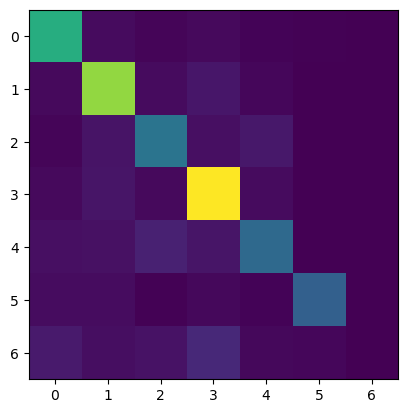

In [29]:
plt.imshow(confusion_matrix(y_true=y_train,y_pred=y_pred_train_tf))

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

/tmp/ipykernel_1726/912901811.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_bis['category'].replace(to_replace='FRA',value='SOC',inplace=True)


<Axes: xlabel='count', ylabel='category'>

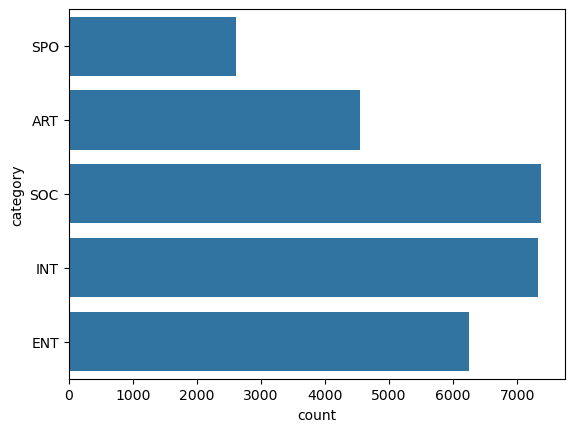

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

data_bis = data[data['category']!='UNE'].copy()
data_bis['category'].replace(to_replace='FRA',value='SOC',inplace=True)

# Plot the statistics of classes
sns.countplot(data=data_bis,y='category')

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.